Score of train data:  0.9375055578421417
Score of test data:  0.94548788629132


c:\Users\josif\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Prediction')

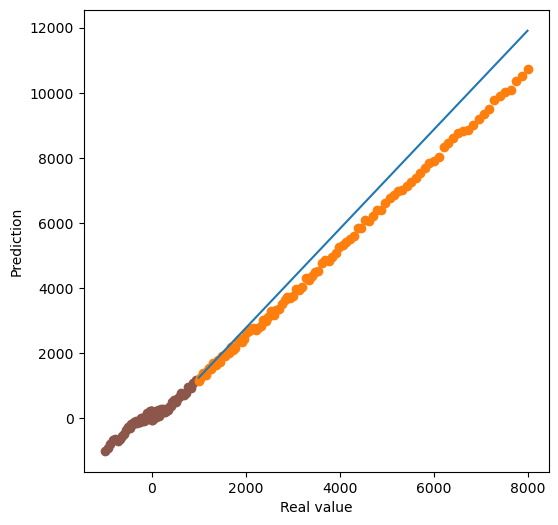

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data_train = np.loadtxt("regression_train.txt")
data_test = np.loadtxt("regression_test.txt")

np.random.shuffle(data_train)

X_train = data_train[:,0].reshape(-1, 1) ** 3
y_train = data_train[:,1] 

x_test = data_test[:,0].reshape(-1, 1) ** 3
y_test = data_test[:,1] 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(x_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(X_train_scaled)

poly2 = PolynomialFeatures(degree=3)
x_poly_test = poly2.fit_transform(X_test_scaled)

mlp_classifier = MLPRegressor(
                    hidden_layer_sizes=(100, 3),
                    activation='relu',
                    solver='lbfgs',
                    alpha=0,
                    learning_rate_init=0.001,
                    max_iter=500,
                    n_iter_no_change=25
                    )
mlp_classifier.fit(X_train, y_train)

print("Score of train data: ", mlp_classifier.score(X_train, y_train))
print("Score of test data: ", mlp_classifier.score(x_test, y_test))

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train, y_train, c='#8c564b')
ax.scatter(x_test, y_test, c='#ff7f0e')
ax.plot(x_test, mlp_classifier.predict(x_test))
ax.set_xlabel('Real value')
ax.set_ylabel('Prediction')